In [1]:
import os
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FOLDER = os.path.join('..', 'data')
DATA_FOLDER_RAW = os.path.join(DATA_FOLDER, 'raw')
DATA_NAME_RAW = 'winequality_90.csv'
SEED = 93849823

# Load Dataset

In [3]:
data_raw = pd.read_csv(os.path.join(DATA_FOLDER_RAW, DATA_NAME_RAW), sep=',')
data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Red,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
1,White,5.7,0.100,0.27,1.3,0.047,21.0,100.0,0.99280,3.27,0.46,9.5,5
2,White,6.9,0.280,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,7
3,White,5.8,0.360,0.38,0.9,0.037,3.0,75.0,0.99040,3.28,0.34,11.4,4
4,White,7.4,0.200,0.36,1.2,0.038,44.0,111.0,0.99260,3.36,0.34,9.9,6


In [4]:
data_raw['quality'].unique()

array([6, 5, 7, 4, 8, 9, 3])

There is not quality below 3 and above 9. Let us take a look how the quality is distributed

In [5]:
data_raw.groupby('quality').quality.value_counts()

quality  quality
3        3            27
4        4           194
5        5          1924
6        6          2552
7        7           971
8        8           174
9        9             5
Name: quality, dtype: int64

In [6]:
data_raw['quality'].describe()

count    5847.000000
mean        5.818881
std         0.873763
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

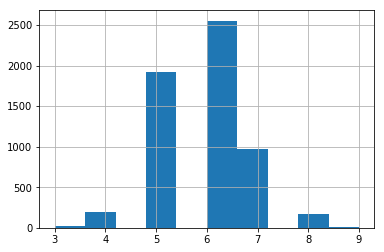

In [7]:
data_raw['quality'].hist()

So, the average wine quality is about 5.8 and just 25% of them have a quality over 6. Only 0.08% of all wines are labeled as quality 9, so this is a extremelly quality.

Let us take a look how the feature are correlated. We are going to consider 0.4 of correlation coefficient as a high correlation.

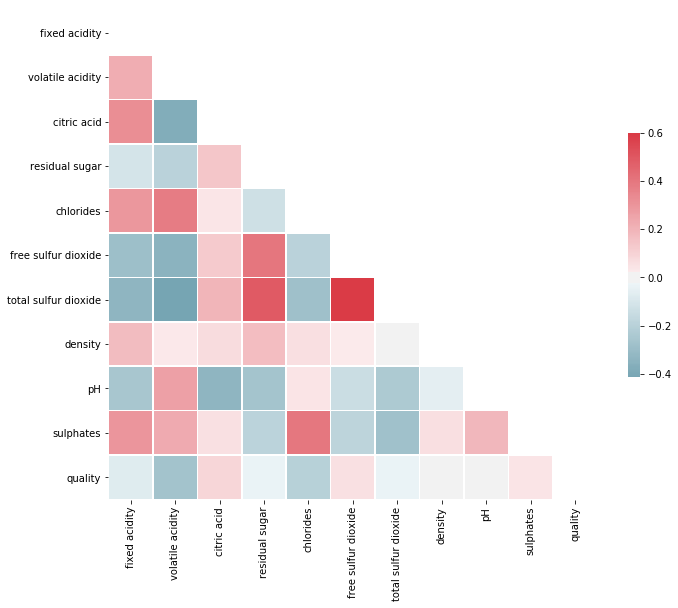

In [8]:
# Compute the correlation matrix
corr = data_raw.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The highlights for positive correlations are:
- The `total sulfur dioxide` is highly with `free sulfur dioxide`
- The `sulphates` and `chlorides` are correlated in about 0.25.

The highlights for negative correlations are:
- `volatile acidicity` is highly with `citric acid` and `total sulfur dioxide`

The feature `density` does not seem to be correlated with anything

Let us take a look what type of features we have here

In [18]:
data_raw.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
dtype: object

We have numerical and categorical features on thie dataset. Let us convert categorical to numerical as

In [19]:
data_raw['type'].unique()

array(['Red', 'White'], dtype=object)

In [20]:
data_raw['type'] = data_raw['type'].map({'Red': 1, 'White': 2})

In [21]:
data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
1,2,5.7,0.100,0.27,1.3,0.047,21.0,100.0,0.99280,3.27,0.46,9.5,5
2,2,6.9,0.280,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,7
3,2,5.8,0.360,0.38,0.9,0.037,3.0,75.0,0.99040,3.28,0.34,11.4,4
4,2,7.4,0.200,0.36,1.2,0.038,44.0,111.0,0.99260,3.36,0.34,9.9,6


Now we must take care of the feature `alcohol`

In [22]:
def str_to_float(s, len_max=5):
    # check string lenght
    if len(s) > len_max:
        return np.NaN
    return float(s)

In [23]:
data_raw['alcohol'] = data_raw['alcohol'].map(str_to_float)

In [24]:
data_raw.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,8.2,0.635,0.10,2.1,0.073,25.0,60.0,0.99638,3.29,0.75,10.9,6
1,2,5.7,0.100,0.27,1.3,0.047,21.0,100.0,0.99280,3.27,0.46,9.5,5
2,2,6.9,0.280,0.24,2.1,0.034,49.0,121.0,0.98882,2.98,0.43,13.2,7
3,2,5.8,0.360,0.38,0.9,0.037,3.0,75.0,0.99040,3.28,0.34,11.4,4
4,2,7.4,0.200,0.36,1.2,0.038,44.0,111.0,0.99260,3.36,0.34,9.9,6


We must check for **NaN** over the entire dataframe

In [29]:
data_raw_dropped = data_raw.dropna()

In [28]:
data_raw.shape

(5847, 13)

In [27]:
data_raw_dropped.shape

(5813, 13)

The number of sample has been dropped!

In [30]:
features=data_raw_dropped.drop(['quality'], axis=1)
labels=data_raw_dropped['quality']

# What are the most relevant feature?! 
Two approaches will be tested: (1) is and ANOVA statistical test selecting a percentage of the most relevant ones and (2) a machine learning approache with a random forest.

In [31]:
from sklearn.feature_selection import SelectPercentile, f_classif

# Select the 30% most relevant features according to an ANOVA test
relevance = SelectPercentile(f_classif, percentile=30)
feature_relevant = relevance.fit_transform(features, labels.values.ravel())

In [32]:
idx_most_relevant = relevance.get_support()
names_most_relevant = features.columns[idx_most_relevant]

scores = -np.log10(relevance.pvalues_[idx_most_relevant])
scores /= scores.max()
# print("Most relevant: \n{}".format(names_most_relevant))

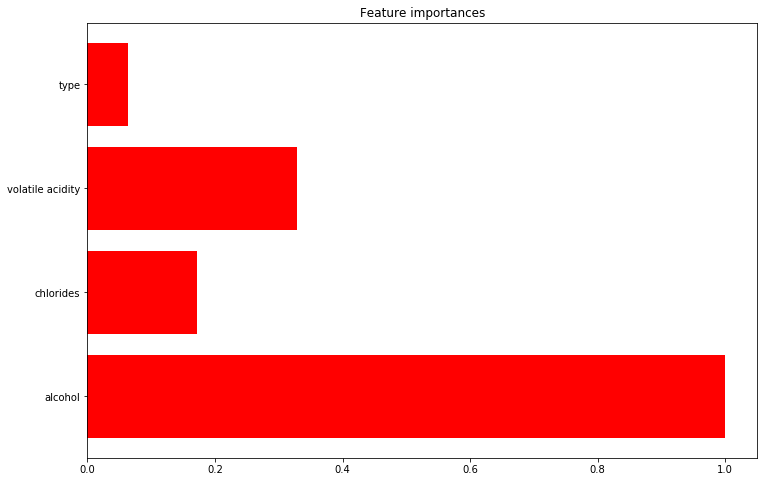

In [33]:
plt.figure(figsize=(12,8))

plt.title("Feature importances")
ax = plt.barh(range(scores.shape[0]), scores, align="center", color='red')
plt.yticks(range(scores.shape[0]), names_most_relevant)
plt.gca().invert_yaxis()